In [41]:
from dataset import TextDataset
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_set = TextDataset(path="dataset/split_train.csv")
val_set = TextDataset(path="dataset/split_val.csv")

========> LOADING DATASET <========
========> LOADING DATASET <========


In [4]:
train_set.data['PRODUCT_LENGTH']

0           614.000000
1           669.000000
2           100.000000
3          1141.732282
4          1299.212597
              ...     
1799753     944.881889
1799754     550.000000
1799755     825.000000
1799756     500.000000
1799757     555.000000
Name: PRODUCT_LENGTH, Length: 1799758, dtype: float64

<Axes: >

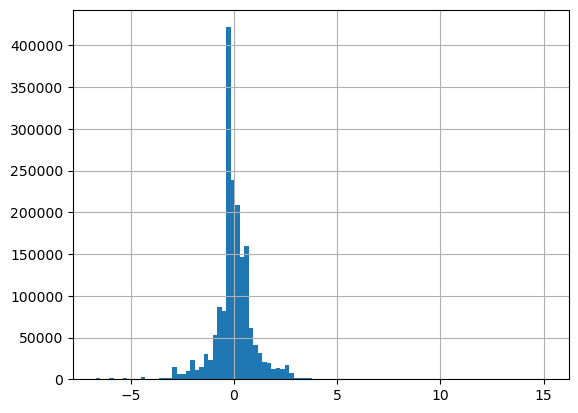

In [132]:

((np.log(lens) - np.log(lens).mean()) / np.log(lens).std()).hist(bins=100)

In [21]:
(train_set.data['PRODUCT_LENGTH'] > 1e5).sum()

1486

In [130]:
np.log(lens1e5).mean(), np.log(lens1e5).std()

(6.550226695387689, 0.9600685060802403)

<Axes: >

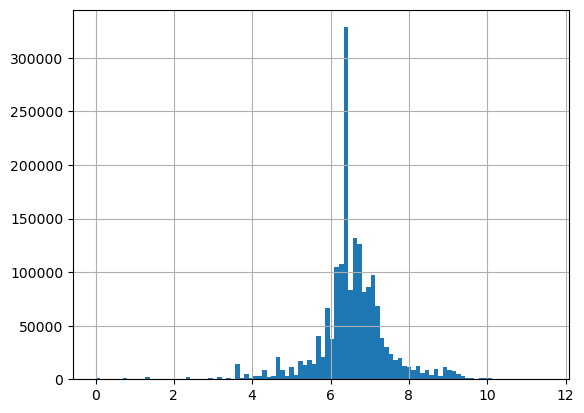

In [134]:
# Plot the distribution of the lengths of the products
lens = train_set.data['PRODUCT_LENGTH']
lens1e4 = lens.loc[lens < 1e4]
lens1e5 = lens.loc[lens < 1e5]
#((np.log(lens1e5) - np.log(lens1e5).mean()) / np.log(lens1e5).std()).hist(bins=100)
np.log(lens1e5).hist(bins=100)

<Axes: >

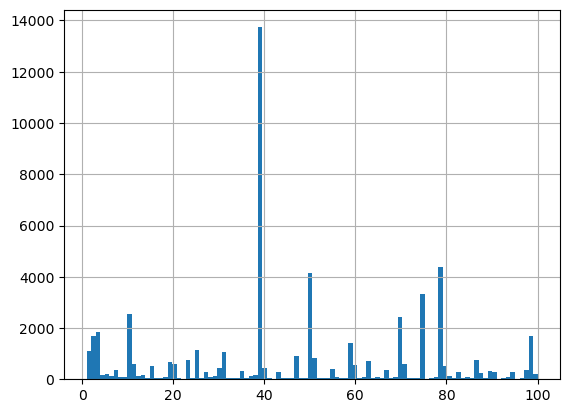

In [122]:
lens.loc[lens < 1e2].hist(bins=100)

In [102]:
def mape(y_true, y_pred):
    return np.abs((y_true - y_pred) / (y_true + 1e-8)).mean()

In [105]:
mape(val_set.data['PRODUCT_LENGTH'], 39.7)

0.9712358591434554

In [107]:
len(lens), len(lens1e5), len(lens1e4)

(1799758, 1798268, 1783593)

In [108]:
(train_set.data['PRODUCT_TYPE_ID'].value_counts() > 1).sum()

1        96867
12064    46101
0        40493
123      25103
6104     23849
         ...  
11340        1
5984         1
8677         1
8610         1
4826         1
Name: PRODUCT_TYPE_ID, Length: 12502, dtype: int64

In [115]:
(train_set.data['PRODUCT_TYPE_ID'].value_counts() > 1).sum()

10535

In [110]:
import pandas as pd
test = pd.read_csv('dataset/test.csv')

In [112]:
test_preds = pd.DataFrame({'PRODUCT_ID': test['PRODUCT_ID'], 'PRODUCT_LENGTH': 39.7})
test_preds.to_csv('dataset/test_preds.csv', index=False)